# NOTEBOOK FOR TESTING PURPOSE

In [2]:
from ocr_ktm import ocr_raw
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# TEST KTP

In [22]:
from ktp_model import KTPModel

def ocr_raw(image):
    image = cv2.resize(image, (50 * 16, 500))

    # crop the image to get the identity text only
    image = image[0:500, 200:580]

    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # img_gray = cv2.equalizeHist(img_gray)
    # img_gray = cv2.fastNlMeansDenoising(img_gray, None, 3, 7, 21)
    # cv2.fillPoly(img_gray, pts=[np.asarray([(540, 150), (540, 499), (798, 499), (798, 150)])], color=(255, 255, 255))
    th, threshed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
    result_raw = pytesseract.image_to_string(threshed, lang="ind")

    return result_raw

def main():
    result_raw = ocr_raw(cv2.imread('image1.jpg'))

    nik = ""
    nama = ""
    tempat_lahir = ""
    tgl_lahir = ""
    jenis_kelamin = ""
    gol_darah = ""
    alamat = ""
    agama = ""
    status_perkawinan = ""
    pekerjaan = ""
    kewarganegaraan = ""

    # remove empty lines
    lines = list(filter(lambda x: x != '', result_raw.split('\n')))
    
    # remove any ':' and '1' character
    lines = list(map(lambda x: x.replace(':', '').replace('1', ''), lines))
    
    # remove any empty space at the beginning and end of the string
    lines = list(map(lambda x: x.strip(), lines))

    for i in lines:
        print(i)
        
    # Find NIK and its index
    nik_index = next((i for i, line in enumerate(lines) if re.match(r'^\d+$', line)), None)
    if nik_index is not None:
        nik = lines[nik_index]
        nik_index += 1
        if nik_index < len(lines):
            nama = lines[nik_index]
            nik_index += 1
        if nik_index < len(lines):
            # check if the line contain any number, if not append it to name, if yes then it's the birth date
            if not any(char.isdigit() for char in lines[nik_index]):
                nama += ' ' + lines[nik_index]
                nik_index += 1
                if nik_index < len(lines):
                    # split lines into tempat_lahir and tgl_lahir by checking ',' character
                    if ',' in lines[nik_index]:
                        tempat_lahir, tgl_lahir = [part.strip() for part in lines[nik_index].split(',')]
                        nik_index += 1
                    else:
                        tempat_lahir = lines[nik_index]
                        nik_index += 1
                        if nik_index < len(lines):
                            tgl_lahir = lines[nik_index]
                            nik_index += 1
            else:
                tgl_lahir = lines[nik_index]
                nik_index += 1
        if nik_index < len(lines):
            jenis_kelamin = lines[nik_index]
            # trim only the first 9 letters
            jenis_kelamin = jenis_kelamin[:9]
            nik_index += 1
        if nik_index < len(lines):
            # get the address of 'alamat' from the next 3 index
            alamat = ' '.join(lines[nik_index:nik_index+4])
            nik_index += 4
        if nik_index < len(lines):
            agama = lines[nik_index]
            nik_index += 1
        if nik_index < len(lines):
            status_perkawinan = lines[nik_index]
            nik_index += 1
        if nik_index < len(lines):
            pekerjaan = lines[nik_index]
    else:
        print('not found')

    print('nik: ' + nik)
    print('nama: ' + nama)
    print('tgl_lahir: ' + tgl_lahir)
    print('tempat_lahir: ' + tempat_lahir)
    print('jenis_kelamin: ' + jenis_kelamin)
    print('alamat: ' + alamat)
    print('agama: ' + agama)
    print('status_perkawinan: ' + status_perkawinan)
    print('pekerjaan: ' + pekerjaan)

    return KTPModel(nik, nama, tempat_lahir, tgl_lahir, jenis_kelamin, gol_darah, alamat, agama, status_perkawinan, pekerjaan, kewarganegaraan)

main()

PROVINSI JAWA TIMUR
KABUPATEN NGANJUK
358055003000
VIRGY FERDIAN SURYA
FIRMANSYAH
NGANJUK, 5-09-2003
LAKI-LAKI Gol. Darah
DUSUN JOHC
00/003
JOHO
PACE
ISLAM
BELUM KAWIN
PELAJAR/MAHA WA
. WNI
SEUMUR HIDUP
nik: 358055003000
nama: VIRGY FERDIAN SURYA FIRMANSYAH
tgl_lahir: 5-09-2003
tempat_lahir: NGANJUK
jenis_kelamin: LAKI-LAKI
alamat: DUSUN JOHC 00/003 JOHO PACE
agama: ISLAM
status_perkawinan: BELUM KAWIN
pekerjaan: PELAJAR/MAHA WA


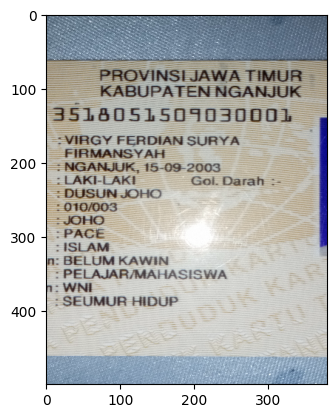

In [21]:
import cv2
from matplotlib.pylab import plt

img = cv2.imread('image1.jpg')

# resize the image
img = cv2.resize(img, (50 * 16, 500))

# crop the image to get the identity text only
img = img[0:500, 200:580]
plt.imshow(img)

# Test Template Matching

In [4]:
import cv2
import numpy as np

In [14]:
def crop_image(imgpath):
    # Read the image and the template
    image = cv2.imread(imgpath)
    template = cv2.imread('template.jpg')
    
    # Convert the images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    # Threshold both images first before using cv2.findContours()
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    _, template = cv2.threshold(template, 127, 255, cv2.THRESH_BINARY)
    
    # Match the template in the image
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Get the coordinates of the template in the image
    top_left = max_loc
    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Crop the image based on the template
    cropped_image = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    # Save the cropped image
    cv2.imwrite('output.jpg', cropped_image)

In [15]:
crop_image('image1.jpg')

# TEST with premade model

In [8]:
from keras.models import load_model
import numpy as np
import imutils
import cv2
from imutils.contours import sort_contours

In [14]:
# Load saved network
load_network = load_model('models/network')

In [21]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
conts = sort_contours(conts, method='left-to-right')[0]

# Detect every single char from contour
detected_chars = []

for c in conts:
    (x, y, w, h ) = cv2.boundingRect(c)

    min_w, max_w = 10, 160
    min_h, max_h = 14, 140

    if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        detected_chars.append(process_box(gray, x, y, w, h))

# Get all char pixel
pixels = np.array([px[0] for px in detected_chars], dtype='float32')

# Predict
preds = load_network.predict(pixels)

# Get the string of detected characters
char_list = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
detected_string = ''

for pred in preds:
    i = np.argmax(pred)
    detected_string += char_list[i]

# Print or use the detected string as needed
print(detected_string)


ValueError: in user code:

    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Documents\College\Projects\flask_ocr\venv\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 3, 4, 3)
